# 12. 건강식

첫 분기한정법 코딩 과제입니다. 문제 자체는 진부했지만, 분기한정법이라는 방법 자체를 이해하는 게 어려웠습니다. 또한, C++ 과 파이썬 간의 연산 시간이 4배 가량 차이가 나는데, 코드 실행 시간은 C++ 기준으로 잡혀있는 터라 계속해서 시간 초과가 났습니다. C++로 문제 풀이를 시도했지만, 좋은 결과를 내지 못해 아쉬웠던 문제였습니다.

## 문제

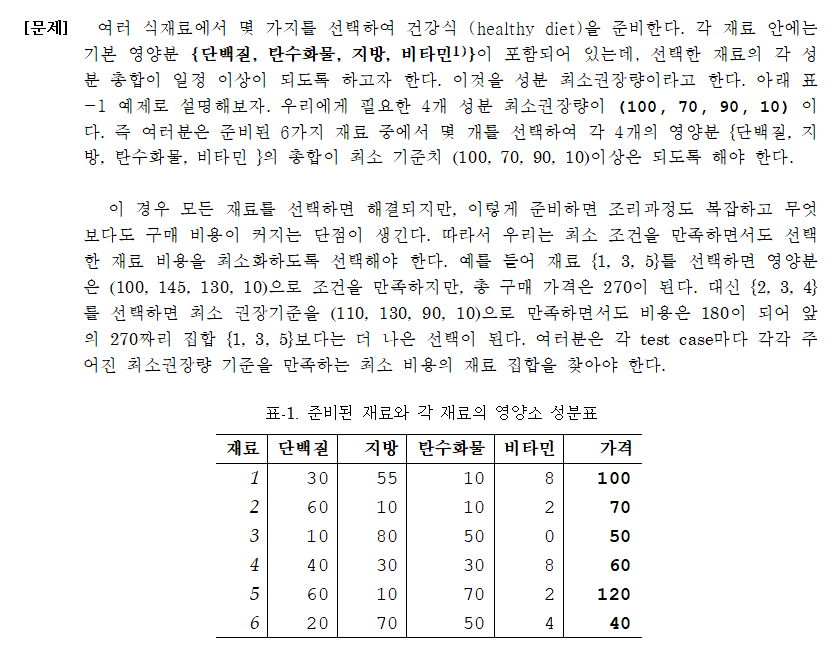

## 입출력

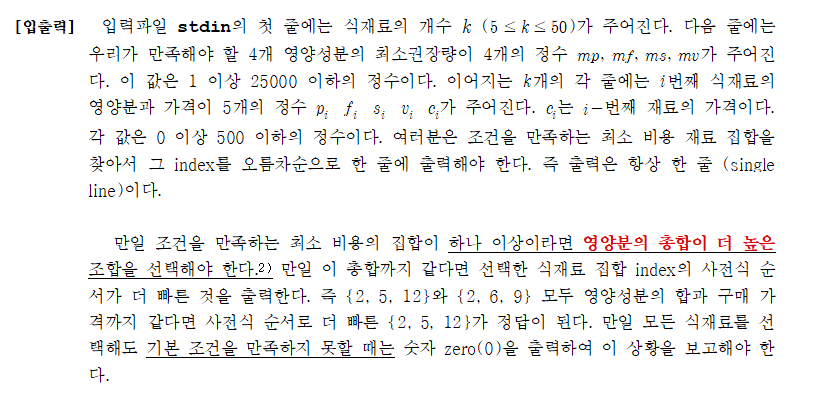

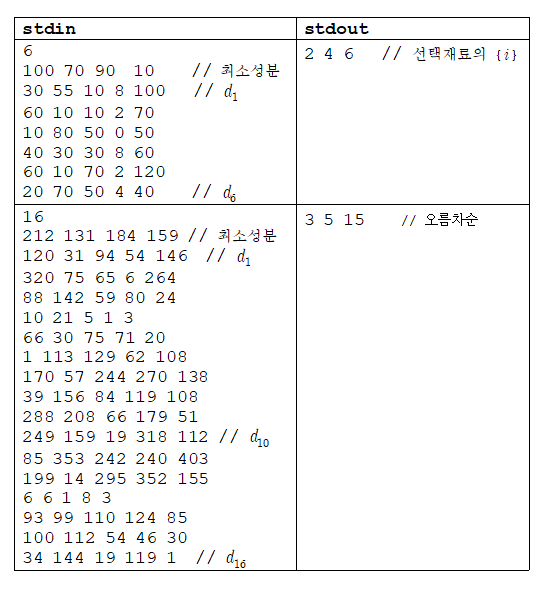

## 기본 세팅

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True) # gdrive 수정 가능하게 함 

Mounted at /content/drive/


In [ ]:
# 수정
add = "_12_건강식(분기한정법)/"

PROJECT_DIR = "/content/drive/MyDrive/2022년/1학기/Computer_Algorithm/과제 파일/" + add

def inp_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.inp'

def out_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.out'

In [ ]:
def test():
  for i in range(1, 6):
    print(f"[{i}]")
    inp_path = inp_pth(i)
    with open(inp_path, 'r') as inp:
      input = inp.readlines()
      
    node_count = int(input[0].split()[0])
    class_ = Stack(node_count)

    out_path = out_pth(i)
    with open(out_path) as out:
      answer = out.read()
    
    class_.input(input[1:])

    class_.out()
    print(f"(answer)\n{answer}")


In [ ]:
import numpy as np

## 풀이

Worst Case에서 분기한정법과 Back Tracking의 차이는 없다. 확보한 해보다 더 좋은 해를 계속 만나 Bound를 할 수 없게 되면, 분기한정법은 Back Tracking과 다를 바 없기 때문이다. 따라서 분기한정법에서 제일 중요한 건 '좋은 해'를 빨리 찾아내는 것이다. 다만, 우리는 상태 공간이 어떻게 생겼는지 알 수 없기 때문에, 어느 정도 짐작으로 좋은 해를 찾아가야 한다. 이때 기준이 되는 것이 '유망함'이다. 어느 state가 유망한지에 대한 기준을 잘 세우면 보다 빨리 좋은 해를 찾아낼 수 있고, 이를 통해 연산 시간을 크게 줄일 수 있다.

주어진 문제에서 줄여야 하는 것은 가격이다. 따라서 나는 유망함의 기준을 '현재 가격 + 앞으로 필요한 기대 가격(중위값)'으로 설정했다. 이를 통해 최대한 빨리 좋은 해를 찾아서 남은 state 공간을 최대한 많이 Bound하는 것이 목표이다.

위의 아이디어를 구현한 의사 코드는 아래와 같다.

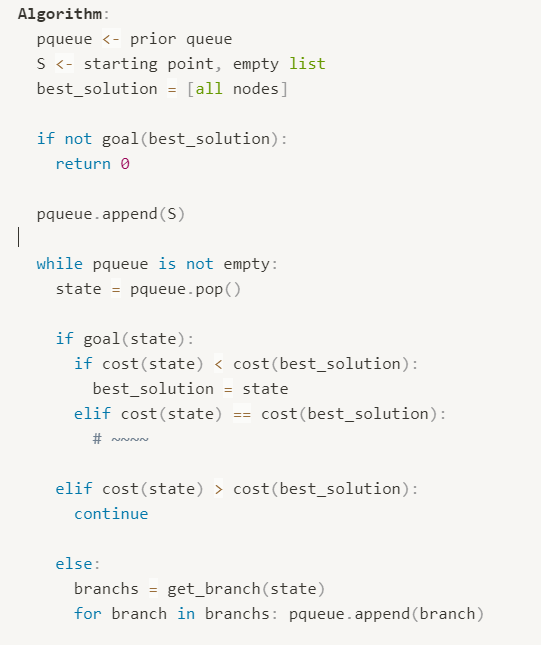

In [ ]:
from queue import PriorityQueue

class Algorithm:
  def __init__(self, count):
    self.count = count
    self.data = np.zeros([count, 5])
    self.pqueue = PriorityQueue()


  def set_(self, inp):
    self.goal_bound = list(map(int, inp.split()))
  

  def input(self, inp):
    for i, row in enumerate(inp):
      self.data[i, :] = list(map(int, row.split()))
    

  def cost(self, state, only_cost = True):
    if only_cost:
      return sum([self.data[node, 4] for node in state])
    else:
      return sum([self.data[node, :] for node in state])


  def score(self, state):
    not_state = list(set(range(self.count)) - set(state))
    not_state = self.data[not_state, :]
    not_state = not_state[:, :4] / not_state[:, 4].reshape(-1,1)

    cost = self.cost(state)

    nutrients = list(sum(self.data[node, :4] for node in state))
    for i, nutrient in enumerate(nutrients):
      d = nutrient - self.goal_bound[i]
      if d < 0:
        cost += - d / np.median(not_state[:, i])
    
    return cost    
  

  def goal(self, state):
    nutrients = list(sum(self.data[node, :4] for node in state))
    for i, nutrient in enumerate(nutrients):
      d = nutrient - self.goal_bound[i]
      if d < 0: return False
    
    return True
  

  def get_branch(self, state):
    not_state = list(set(range(self.count)) - set(state))
    for node in not_state:
      state_tmp = state.copy()
      state_tmp = state_tmp + [node]
      score = self.score(state_tmp)
      self.pqueue.put((score, state_tmp))


  def out(self):
    self.get_branch([])
    best_solution = list(range(self.count))
    best_solution_row = self.cost(best_solution, False)

    if not self.goal(best_solution):
      return "0"

    while self.pqueue.qsize() != 0:
      state = self.pqueue.get()[1]
      state.sort()

      if self.goal(state):
        state_row = self.cost(state, False)

        if state_row[4] < best_solution_row[4]:
          best_solution = state
          best_solution_row = self.cost(best_solution, False)

        elif state_row[4] == best_solution_row[4]:
          if sum(state_row[:4]) > sum(best_solution_row[:4]):
            best_solution = state
            best_solution_row = self.cost(best_solution, False)
            
          elif sum(state_row[:4]) == sum(best_solution_row[:4]) and "".join(list(map(str, state))) < "".join(list(map(str, best_solution))):
            best_solution = state
            best_solution_row = self.cost(best_solution, False)
      
      elif self.cost(state) >= best_solution_row[4]: continue

      else:
        self.get_branch(state)
    
    for i in range(len(best_solution)): best_solution[i] = best_solution[i] + 1
    
    return " ".join(list(map(str, best_solution)))

In [ ]:
def test():
  for i in range(1, 6):
    print(f"[{i}]")
    inp_path = inp_pth(i)
    with open(inp_path, 'r') as inp:
      input = inp.readlines()
      
    node_count = int(input[0].split()[0])
    class_ = Algorithm(node_count)

    out_path = out_pth(i)

    with open(out_path) as out:
      answer = out.read()
    
    class_.set_(input[1])
    class_.input(input[2:])

    out = class_.out()
    print(f"(out) : {out}// (answer) : {answer}")


In [ ]:
test()

[1]
(out) : 2 4 6// (answer) : 2 4 6 

[2]
(out) : 3 5 15// (answer) : 3 5 15 

[3]
(out) : 1 2 3 6// (answer) : 1 2 3 6 
[4]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in double_scalars


(out) : 1 2 3 5// (answer) : 1 2 3 5 
[5]
(out) : 0// (answer) : 0


## 최종 제출 파일

In [ ]:
from queue import PriorityQueue
import numpy as np

class Algorithm:
  def __init__(self, count):
    self.count = count
    self.data = np.zeros([count, 5])
    self.pqueue = PriorityQueue()


  def set_(self, inp):
    self.goal_bound = list(map(int, inp.split()))
  

  def input(self, inp):
    for i, row in enumerate(inp):
      self.data[i, :] = list(map(int, row.split()))
    

  def cost(self, state, only_cost = True):
    if only_cost:
      return sum([self.data[node, 4] for node in state])
    else:
      return sum([self.data[node, :] for node in state])


  def score(self, state):
    not_state = list(set(range(self.count)) - set(state))
    not_state = self.data[not_state, :]
    not_state = not_state[:, :4] / not_state[:, 4].reshape(-1,1)

    cost = self.cost(state)

    nutrients = list(sum(self.data[node, :4] for node in state))
    for i, nutrient in enumerate(nutrients):
      d = nutrient - self.goal_bound[i]
      if d < 0:
        nut = not_state[:, i]
        nut = nut[nut != 0]
        # cost += - d / np.median(nut)
        cost += - d / np.mean(nut)

    return cost    
  

  def goal(self, state):
    nutrients = list(sum(self.data[node, :4] for node in state))
    for i, nutrient in enumerate(nutrients):
      d = nutrient - self.goal_bound[i]
      if d < 0: return False
    
    return True
  

  def get_branch(self, state):
    not_state = list(set(range(self.count)) - set(state))
    for node in not_state:
      state_tmp = state.copy()
      state_tmp = state_tmp + [node]
      score = self.score(state_tmp)
      self.pqueue.put((score, state_tmp))


  def out(self):
    self.get_branch([])
    best_solution = list(range(self.count))
    best_solution_row = self.cost(best_solution, False)

    if not self.goal(best_solution):
      return "0"

    while self.pqueue.qsize() != 0:
      state = self.pqueue.get()[1]
      state.sort()

      if self.goal(state):
        state_row = self.cost(state, False)

        if state_row[4] < best_solution_row[4]:
          best_solution = state
          best_solution_row = self.cost(best_solution, False)

        elif state_row[4] == best_solution_row[4]:
          if sum(state_row[:4]) > sum(best_solution_row[:4]):
            best_solution = state
            best_solution_row = self.cost(best_solution, False)
            
          elif sum(state_row[:4]) == sum(best_solution_row[:4]) and "".join(list(map(str, state))) < "".join(list(map(str, best_solution))):
            best_solution = state
            best_solution_row = self.cost(best_solution, False)
      
      elif self.cost(state) >= best_solution_row[4]: continue

      else:
        self.get_branch(state)
    
    for i in range(len(best_solution)): best_solution[i] = best_solution[i] + 1
    
    return " ".join(list(map(str, best_solution)))


count = int(input())
algorithm = Algorithm(count)

inp = [input() for _ in range(count + 1)]
algorithm.set_(inp[0])
algorithm.input(inp[1:])
print(algorithm.out())

## 결과

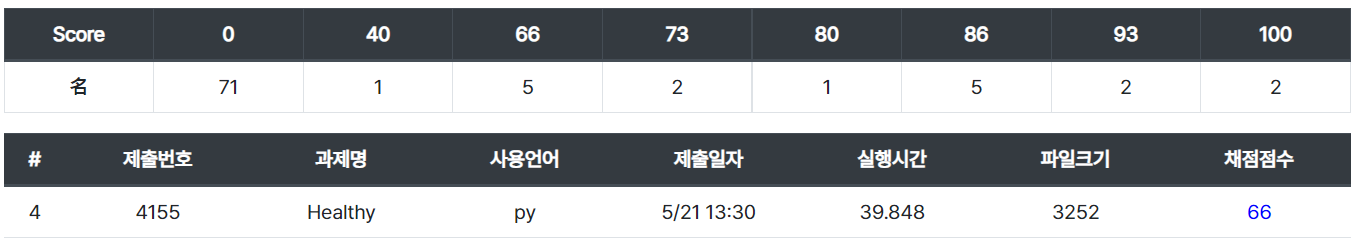